In [38]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [39]:
mnist = keras.datasets.mnist

In [40]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [41]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [42]:
print(type(x_train), type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [43]:
#normalize 0-255 --> 0-1
x_train, x_test = x_train/255, x_test/255

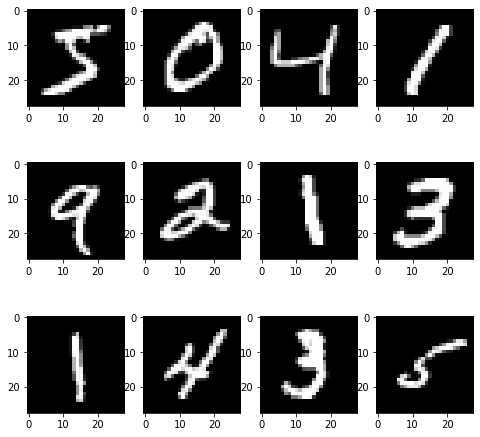

In [44]:
plt.figure(figsize=(8,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(x_train[i], cmap="gray")
plt.show()

In [45]:
#model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10)
])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
# another way to build the Sequential model:
#modelx = keras.models.Sequential()
#modelx.add(keras.layers.Flatten(input_shape=(28,28)))
#modelx.add(keras.layers.Dense(128, activation='relu'))
#modelx.add(keras.layers.Dense(10))

In [49]:
# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]
model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [58]:
# training
batch_size = 64
epochs = 20
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2)

Epoch 1/20
938/938 - 2s - loss: 0.0083 - accuracy: 0.9978
Epoch 2/20
938/938 - 2s - loss: 0.0079 - accuracy: 0.9977
Epoch 3/20
938/938 - 2s - loss: 0.0057 - accuracy: 0.9987
Epoch 4/20
938/938 - 2s - loss: 0.0054 - accuracy: 0.9987
Epoch 5/20
938/938 - 2s - loss: 0.0029 - accuracy: 0.9995
Epoch 6/20
938/938 - 2s - loss: 0.0074 - accuracy: 0.9978
Epoch 7/20
938/938 - 2s - loss: 0.0044 - accuracy: 0.9987
Epoch 8/20
938/938 - 2s - loss: 0.0046 - accuracy: 0.9986
Epoch 9/20
938/938 - 2s - loss: 0.0016 - accuracy: 0.9998
Epoch 10/20
938/938 - 2s - loss: 0.0058 - accuracy: 0.9982
Epoch 11/20
938/938 - 2s - loss: 0.0037 - accuracy: 0.9991
Epoch 12/20
938/938 - 2s - loss: 0.0013 - accuracy: 0.9998
Epoch 13/20
938/938 - 2s - loss: 0.0030 - accuracy: 0.9993
Epoch 14/20
938/938 - 2s - loss: 0.0060 - accuracy: 0.9980
Epoch 15/20
938/938 - 2s - loss: 0.0018 - accuracy: 0.9997
Epoch 16/20
938/938 - 2s - loss: 6.0902e-04 - accuracy: 0.9999
Epoch 17/20
938/938 - 2s - loss: 3.6922e-04 - accuracy: 1.000

In [59]:
# evaulate
model.evaluate(x_test, y_test, batch_size=batch_size, verbose=2)

157/157 - 0s - loss: 0.0934 - accuracy: 0.9813


[0.09344058483839035, 0.9812999963760376]

In [62]:
# predictions
# 1. option: build new model with Softmax layer
probability_model = keras.models.Sequential([
    model,
    keras.layers.Softmax()
])

predictions = probability_model(x_test)
pred0 = predictions[0]
print(pred0)


tf.Tensor(
[2.3280592e-16 1.1123754e-17 9.9803932e-12 1.7976810e-09 6.4784620e-25
 6.4955669e-16 4.3372066e-25 1.0000000e+00 1.8298278e-14 6.8953992e-12], shape=(10,), dtype=float32)


In [63]:
# use np.argmax to get label with highest probability
label0 = np.argmax(pred0)
print(label0)

7


In [55]:
# 2. option: original model + nn.softmax, call model(x)
predictions = model(x_test)
predictions = tf.nn.softmax(predictions)
pred0 = predictions[0]
print(pred0)
label0 = np.argmax(pred0)
print(label0)

tf.Tensor(
[2.9420546e-11 1.5709913e-11 3.0222597e-07 1.2155355e-05 5.6226820e-16
 6.7625577e-10 1.7438933e-16 9.9998736e-01 2.0155486e-09 8.5693507e-08], shape=(10,), dtype=float32)
7


In [56]:
# 3. option: original model + nn.softmax, call model.predict(x)
predictions = model.predict(x_test, batch_size=batch_size)
predictions = tf.nn.softmax(predictions)
pred0 = predictions[0]
print(pred0)
label0 = np.argmax(pred0)
print(label0)

tf.Tensor(
[2.9420546e-11 1.5709913e-11 3.0222597e-07 1.2155355e-05 5.6226820e-16
 6.7625577e-10 1.7438933e-16 9.9998736e-01 2.0155486e-09 8.5693507e-08], shape=(10,), dtype=float32)
7


In [64]:
# call argmax for multiple labels
pred05s = predictions[0:5]
print(pred05s.shape)
label05s = np.argmax(pred05s, axis=1)
print(label05s)

(5, 10)
[7 2 1 0 4]
